## Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.


## Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
data.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


 ## EDA

In [10]:
len(data)


247

In [11]:
data.columns

Index(['Bejaia Region Dataset '], dtype='object')

In [12]:
data.index

MultiIndex([('day', 'month', 'year', 'Temperature', ' RH', ' Ws', ...),
            ( '01',    '06', '2012',          '29',  '57',  '18', ...),
            ( '02',    '06', '2012',          '29',  '61',  '13', ...),
            ( '03',    '06', '2012',          '26',  '82',  '22', ...),
            ( '04',    '06', '2012',          '25',  '89',  '13', ...),
            ( '05',    '06', '2012',          '27',  '77',  '16', ...),
            ( '06',    '06', '2012',          '31',  '67',  '14', ...),
            ( '07',    '06', '2012',          '33',  '54',  '13', ...),
            ( '08',    '06', '2012',          '30',  '73',  '15', ...),
            ( '09',    '06', '2012',          '25',  '88',  '13', ...),
            ...
            ( '21',    '09', '2012',          '35',  '34',  '17', ...),
            ( '22',    '09', '2012',          '33',  '64',  '13', ...),
            ( '23',    '09', '2012',          '35',  '56',  '14', ...),
            ( '24',    '09', '2012',          '2

In [13]:
## Data is there in indexes so reset the indexes
## The reset_index() method allows you reset the index back to the default 0, 1, 2 etc indexes.
data=data.reset_index()
data.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,Bejaia Region Dataset
0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [14]:
## With reset indexes we got column names so renaming the column names with first row names
data.columns=data.iloc[0]
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [15]:
## Our dataset is ready with columns and expeted names.
## But now we dont need 0th row...so removing the 0th row
data=data[1:]
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [16]:
## Due to this indexing is starting from 1 so again resetting the index
data=data.reset_index(drop=True)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [17]:
len(data)

246

In [18]:
## Confirming columns
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object', name=0)

In [19]:
## Checking for null values
data.isnull().sum()

0
day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [20]:
## Checking where the null values are present so as to handle them in Feature Engineering Section
np.where(data.isnull())

(array([122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
        167], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 13],
       dtype=int64))

In [21]:
## If we check the excel dataset there based on 2 regions thus 1 line is seperating which is coming as null.
data.iloc[122]

0
day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Name: 122, dtype: object

In [22]:
## Other null value record is 167
## Here classes record is there in FWI so need to handle this in FE section
data.iloc[167]

0
day                 14
month               07
year              2012
Temperature         37
 RH                 37
 Ws                 18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Name: 167, dtype: object

In [23]:
## If all columns are object type then there would be some record with string
data.dtypes

0
day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [24]:
## If we will see the data['Classes   '] columnn has multiple spaces after actual Name.So rename the column Classes by striping space
data['Classes  ']

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
241         fire   
242     not fire   
243     not fire   
244     not fire   
245    not fire    
Name: Classes  , Length: 246, dtype: object

In [25]:
## If we see values in classes column is with inconsistant spaces so strip the before and after spaces
data['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       nan, 'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [26]:
## How many unique values each column is having
data.nunique()

0
day             33
month            5
year             2
Temperature     20
 RH             63
 Ws             19
Rain            40
FFMC           174
DMC            167
DC             199
ISI            107
BUI            175
FWI            128
Classes          9
dtype: int64

In [61]:
## The correlation between all variables
## Go in feature engineering section and change dataframe to numeric type
data.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,,,,,,,,,,,,,,,
day,1.000000e+00,0.000000,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.177727,0.517229,0.350755,-0.201784,-4.959818e-18
month,0.000000e+00,1.000000,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.061680,0.085822,0.082611,-0.022333,0.000000e+00
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-0.059017,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.564581,-0.518119,2.734961e-01
RH,-7.420934e-02,-0.037884,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.577554,0.435023,-4.064239e-01
Ws,4.700086e-02,-0.041447,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.032302,0.066529,-1.768290e-01
Rain,-1.122654e-01,0.035322,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.324365,0.379449,-4.108006e-02
FFMC,2.240321e-01,0.015577,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.690278,-0.770114,2.246798e-01
DMC,4.915710e-01,0.068178,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875829,-0.584188,1.910937e-01


If we see the above correlation so for classification problem class is highly correlated with RH,WS,Rain

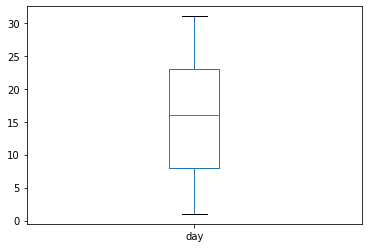

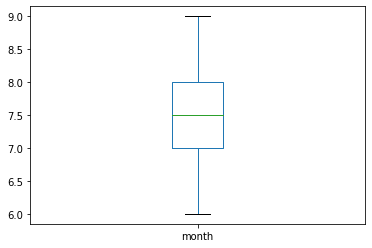

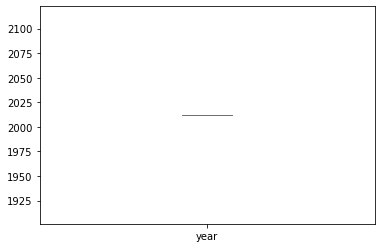

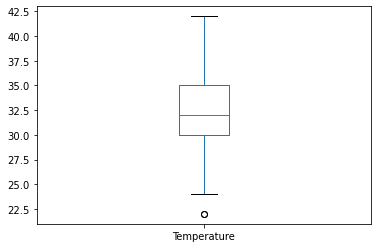

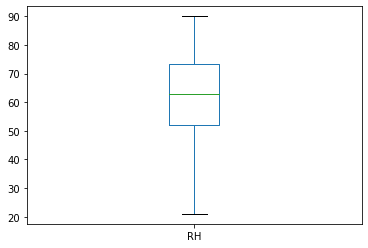

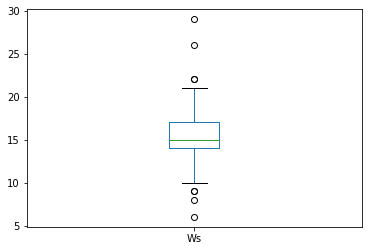

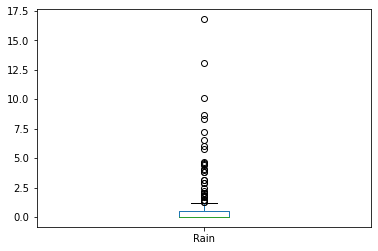

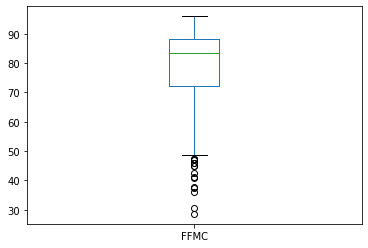

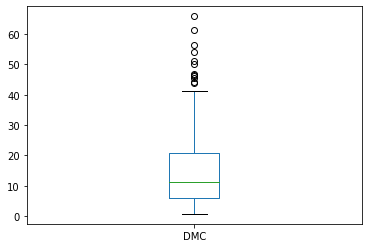

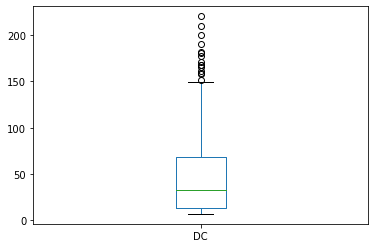

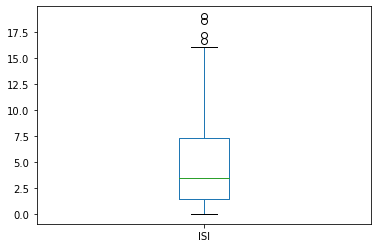

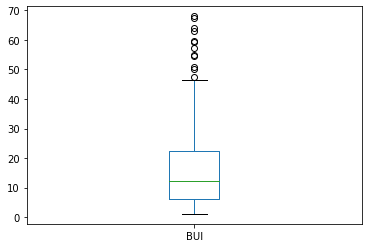

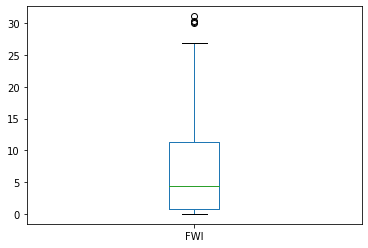

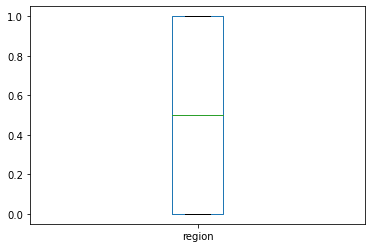

In [62]:
#Firstly go in feature Engineering Section and remove extra spaces in RH,Ws,Rain column names
## With this we can get Idea of outliers
for col in data.columns:
    if(col!='Classes'):
        data[[col]].plot.box()

Outliers are present in Temperature,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI

<AxesSubplot:xlabel='0', ylabel='0'>

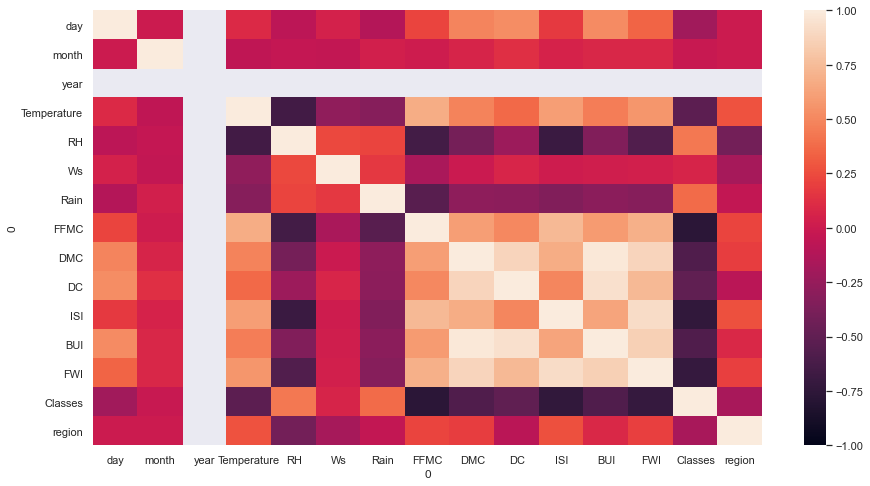

In [63]:
## Heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme()
sns.heatmap(data.corr(),vmin=-1, vmax=1)

In [64]:
## No duplicates
data.duplicated().sum()

0

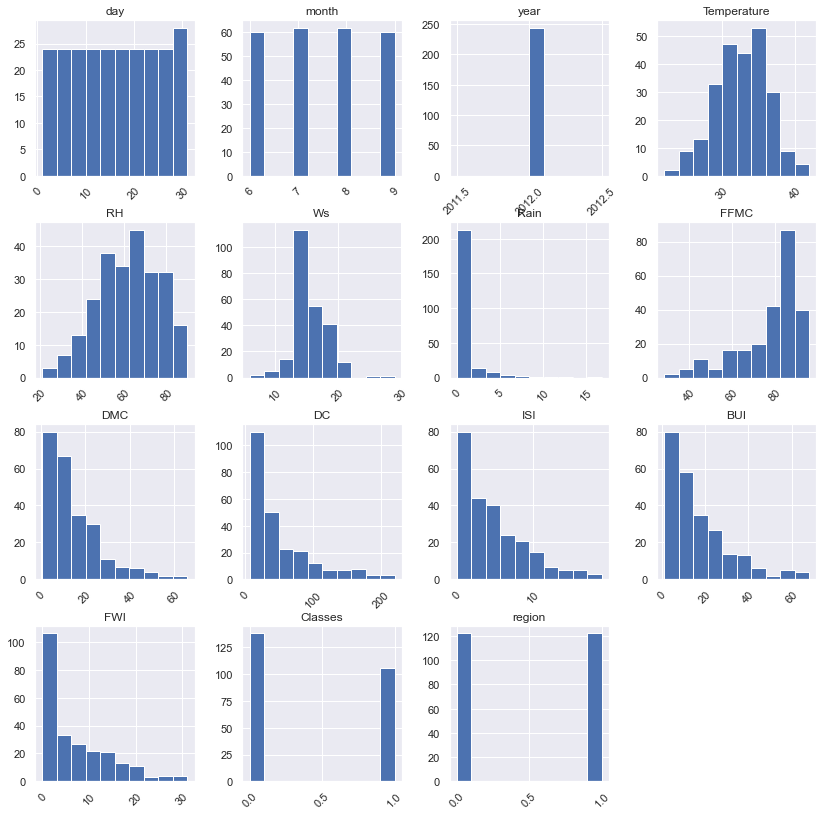

In [65]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

## EDA Conclusion
1. Drop 122 row from data due to null values
2. Handle 167 row of data FWI value and classes value and DC value where space is there which can cause issue while numeric        conversion. 
3. All column data types are coming as objects i.e. some string reocrds will be there so check and handle those
4. Rename Column Classes by stripping space
5. Strip inconsistent spaces in data[Classes] column which has fire and not fire
6. As mentioned in data description 2 regions 122 records are there so create new columns with label 0 for Bejaia Region and
   label 1 for Sidi-Bel Abbes Region.
7. Covert all columns of dataframe except Classes to numeric types
8. Remove extra spaces from RH,WS,Rain column names
9. Convert classes fire to 0 and not fire to 1
10. Handle outliers

## Feature Engineering

In [27]:
## Dropping 122th row NaN values
data=data.drop(122)

In [28]:
## Checking null values after drop
data.isnull().sum()

0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [29]:
## After dropping 122 th row resetting the index so that all sequence after 122 is maintained
data=data.reset_index(drop=True)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [30]:
## Now after dropping 122 row only 1 row having null value
np.where(data.isnull())

(array([166], dtype=int64), array([13], dtype=int64))

In [31]:
data.iloc[166]

0
day                 14
month               07
year              2012
Temperature         37
 RH                 37
 Ws                 18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Name: 166, dtype: object

In [32]:
## If we check the FWI column to replace it with some value then we could see 128 distinct values are there
## Thus we can say it is a continuous feature so we can try replacing it with mean value
## After stripping spaces in fire and not fire handle the class NaN
len(data['FWI'].unique())

128

In [33]:
## Before that we know all columns are of object type so replacing null values with mean would not be possible
## So firstly find where string values are there
## So block moved to except block at 122 nd row

for i in range(len(data)):
    try:
        x=int(data['day'][i])
    except:
        print("Cannot convert to int for -",i," index")

Cannot convert to int for - 122  index


In [34]:
## Check 122 th row
data.iloc[122]

0
day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Name: 122, dtype: object

In [35]:
## We have the column names again due to region seperation so drop the 122 th row and and again reset index
data=data.drop(122)
data=data.reset_index(drop=True)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [36]:
## Now Len of data came as expected to 244 records
len(data)

244

In [37]:
## Rename column by stripping the extra spaces
data.rename(columns={'Classes  ':'Classes'},inplace=True)

In [38]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object', name=0)

In [39]:
## Strip extra spaces in fire and non fire of data classes
data['Classes']=data['Classes'].str.strip()

In [40]:
data['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [41]:
np.where(data['Classes'].isnull())

(array([165], dtype=int64),)

In [42]:
## Filling NA value in Class with category which is having more count
fire_count=len(data[data['Classes']=='fire'])
not_fire_count=len(data[data['Classes']=='not fire'])
if(fire_count>not_fire_count):
    data['Classes']=data['Classes'].fillna('fire')
else:
    data['Classes']=data['Classes'].fillna('not fire')

In [43]:
data['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [44]:
## Find the FWI which cannot be converted to numerical value
for i in range(len(data)):
    try:
        x=float(data['FWI'][i])
    except:
        print("Cannot convert FWI at ",i ,"Index")

Cannot convert FWI at  165 Index


In [45]:
## Replace FWI fire value to 0 for now
## Once we convert dataframe to numerical type then have mean value as FWI
data['FWI'][165]='0'

In [46]:
data.iloc[165]

0
day                14
month              07
year             2012
Temperature        37
 RH                37
 Ws                18
Rain              0.2
FFMC             88.9
DMC              12.9
DC             14.6 9
ISI              12.5
BUI              10.4
FWI                 0
Classes          fire
Name: 165, dtype: object

In [47]:
## In DC column we could see value is 14.6 9 which can cause issue while converting it into numeric value
data['DC'][165]=data['DC'][165].split(" ")[0]

In [48]:
## Now 165th row is also fixed
## After converting data frame into numeric have FWI of 165 th row as mean of all FWI
data.iloc[165]

0
day              14
month            07
year           2012
Temperature      37
 RH              37
 Ws              18
Rain            0.2
FFMC           88.9
DMC            12.9
DC             14.6
ISI            12.5
BUI            10.4
FWI               0
Classes        fire
Name: 165, dtype: object

In [49]:
## All columns are of datatype object
data.dtypes

0
day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [50]:
## Except classes all columns are converted into numeric types 
for col in data.columns:
    if(col!='Classes'):
        data[col]=pd.to_numeric(data[col])
data.dtypes

0
day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [51]:
## Handling 0 FWI value by replacing it with mean
data['FWI'][165]=round(data['FWI'].mean(),2)

<ipython-input-51-dbe65da31483>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FWI'][165]=round(data['FWI'].mean(),2)


In [52]:
## Now 165th row also is fixed
data.iloc[165]

0
day              14
month             7
year           2012
Temperature      37
 RH              37
 Ws              18
Rain            0.2
FFMC           88.9
DMC            12.9
DC             14.6
ISI            12.5
BUI            10.4
FWI            7.01
Classes        fire
Name: 165, dtype: object

In [53]:
## Creating new column region 122 records are there for each region so create new columns with label 0 for Bejaia Region(first 122) and
## label 1 for Sidi-Bel Abbes Region(last 122).
data['region']=0
data['region'][122:]=1

<ipython-input-53-7e23eb3a0e4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['region'][122:]=1
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [54]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [55]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object', name=0)

In [56]:
## Remove extra spaces from RH,WS,Rain column names
data.rename(columns={' RH':'RH',' Ws':'Ws','Rain ':'Rain'},inplace=True)

In [57]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object', name=0)

In [58]:
## Change class labels 0-fire and 1-not fire
data['Classes']=data['Classes'].map({'fire':0,'not fire':1})

In [59]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [60]:
data.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,,,,,,,,,,,,,,,
day,1.000000e+00,0.000000,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.177727,0.517229,0.350755,-0.201784,-4.959818e-18
month,0.000000e+00,1.000000,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.061680,0.085822,0.082611,-0.022333,0.000000e+00
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-0.059017,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.564581,-0.518119,2.734961e-01
RH,-7.420934e-02,-0.037884,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.577554,0.435023,-4.064239e-01
Ws,4.700086e-02,-0.041447,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.032302,0.066529,-1.768290e-01
Rain,-1.122654e-01,0.035322,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.324365,0.379449,-4.108006e-02
FFMC,2.240321e-01,0.015577,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.690278,-0.770114,2.246798e-01
DMC,4.915710e-01,0.068178,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875829,-0.584188,1.910937e-01


In [64]:
## Detecting outliers in suspected column where outliers were visible in boxplot
## Imputing those with median value
X=['Temperature','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']
for col in X:
    sorted_data=data[col].sort_values()
    q1=np.percentile(sorted_data,[25])
    q3=np.percentile(sorted_data,[75])
    median=np.median(sorted_data)
    IQR=q3-q1
    lower_fence=q1-(1.5*IQR)
    upper_fence=q3+(1.5*IQR)

    outliers=[]
    for i in range(0,len(data)):
        if(data[col][i]<lower_fence or data[col][i]>upper_fence):
            outliers.append(data[col][i])
            data[col][i]=median
        
    print("No of outliers in ",col," Column is-",len(outliers),'and they are-',outliers," median here is-",median)

No of outliers in  Temperature  Column is- 2 and they are- [22, 22]  median here is- 32.0
No of outliers in  Ws  Column is- 8 and they are- [22, 22, 26, 9, 9, 8, 6, 29]  median here is- 15.0
No of outliers in  Rain  Column is- 35 and they are- [1.3, 13.1, 2.5, 3.1, 1.4, 16.8, 7.2, 10.1, 3.8, 1.8, 1.8, 4.6, 8.3, 5.8, 1.8, 1.4, 4.0, 2.0, 1.3, 2.0, 4.7, 8.7, 4.5, 1.7, 2.2, 6.0, 1.9, 3.8, 2.9, 3.1, 2.9, 4.1, 6.5, 2.0, 4.4]  median here is- 0.0
No of outliers in  FFMC  Column is- 16 and they are- [47.1, 28.6, 36.1, 37.3, 46.0, 30.5, 42.6, 40.9, 47.4, 44.9, 47.4, 45.0, 47.4, 37.9, 41.1, 45.9]  median here is- 83.5
No of outliers in  DMC  Column is- 12 and they are- [43.9, 45.6, 47.0, 50.2, 54.2, 44.2, 46.6, 46.1, 51.3, 56.3, 61.3, 65.9]  median here is- 11.3
No of outliers in  DC  Column is- 15 and they are- [151.3, 161.5, 171.3, 181.3, 190.6, 200.2, 210.4, 220.4, 180.4, 157.5, 167.2, 177.3, 166.0, 159.1, 168.2]  median here is- 33.1
No of outliers in  ISI  Column is- 4 and they are- [18.5, 

<ipython-input-64-5a56b8a419c1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i]=median


## Feature Selection- Classification w.r.t. Classes as output Feature

In [68]:
X=list(data.columns)
X.remove('Classes')

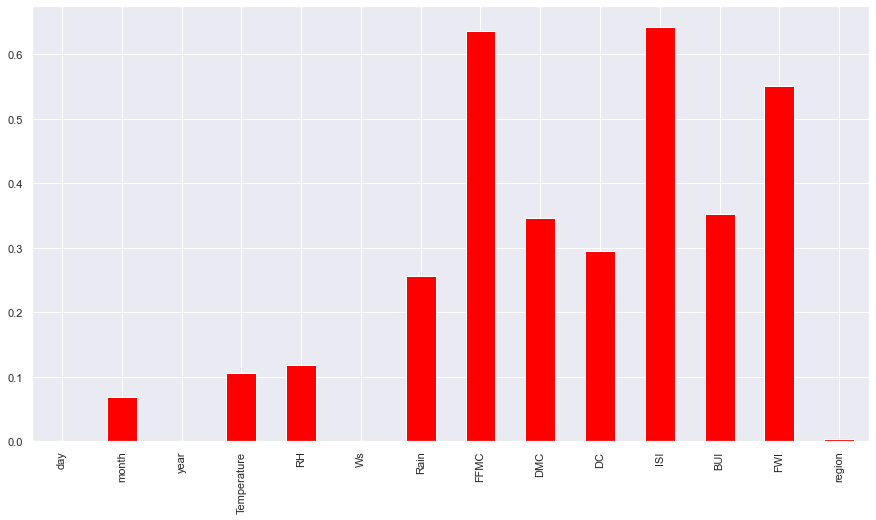

In [69]:
## Getting importance of feature wrt to Classes
from sklearn.feature_selection import mutual_info_classif

importances=mutual_info_classif(data[X],data['Classes'])
feature_importances=pd.Series(importances,X)
feature_importances.plot(kind='bar',color='red')
plt.show()

Top 7 features based on importance for Classification are
1.FFMC 2.ISI 3.FWI 4.BUI 5.DMC 6.DC 7.Rain

## Feature Selection- Classification w.r.t. Temprature as output Feature¶

In [81]:
X=list(data.columns)
X.remove('Temperature')

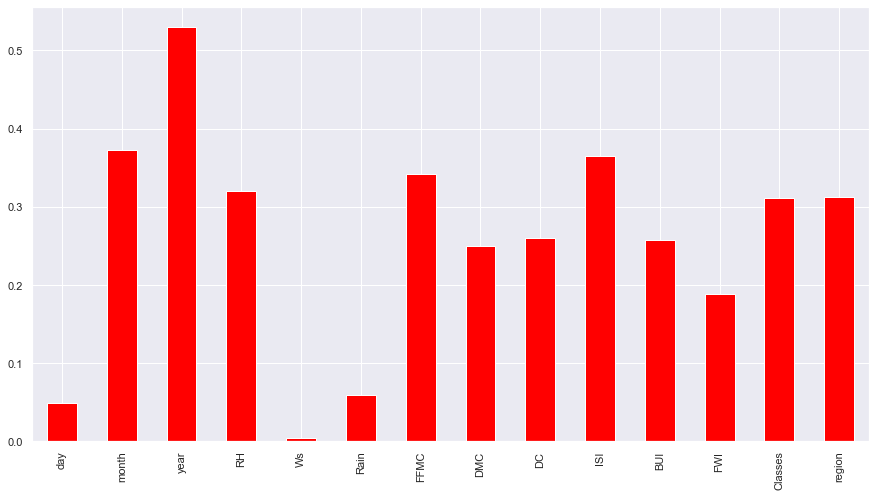

In [82]:
from sklearn.feature_selection import mutual_info_classif

importances=mutual_info_classif(data[X],data['Temperature'])
feature_importances=pd.Series(importances,X)
feature_importances.plot(kind='bar',color='red')
plt.show()

Top 8 features based on importance for Regression are
1.year 2.month 3.day 4.ISI 5.FFMC 6.RH 7.Classes 8.Region

## Model Building- Classification

In [156]:
## Create Independent and Dependent features
X=data[['FFMC','ISI','FWI','BUI','DMC','DC','Rain']]
Y=data['Classes']

In [157]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

## Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
regressor=LinearRegression()
linear=regressor.fit(X_train,Y_train)
Y_pred=linear.predict(X_test)
print("r2 Score-",r2_score(Y_test,Y_pred))
mse_values=cross_val_score(regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
print(np.mean(mse_values))

r2 Score- 0.6733754054712402
-0.08905431919193357


## Ridge Regression

In [116]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
regressor=Ridge()
ridge=regressor.fit(X_train,Y_train)
Y_pred=ridge.predict(X_test)
print("r2 Score-",r2_score(Y_test,Y_pred))
parameters={'alpha':[1e-15,1e-3,1e-3,1e-2,1,5,10,20,30,40,50]}
mse_values=cross_val_score(regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
print(np.mean(mse_values))
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
ridge_regressor.fit(X,Y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

r2 Score- 0.6728683399749971
-0.08903629928169512
Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 1}
-0.08903629928169512


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


## Lasso Regression

In [117]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
regressor=Lasso()
lasso=regressor.fit(X_train,Y_train)
Y_pred=lasso.predict(X_test)
print("r2 Score-",r2_score(Y_test,Y_pred))
parameters={'alpha':[1e-15,1e-3,1e-3,1e-2,1,5,10,20,30,40,50]}
mse_values=cross_val_score(regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
print(np.mean(mse_values))
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
lasso_regressor.fit(X,Y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

r2 Score- 0.5780286637459707
-0.11218492105608072
Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 1e-15}
-0.08905431919193355


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2036371323112327, tolerance: 0.005995081967213115
  model = cd_fast.enet_coordinate_descent(


## Elastic Net Regression

In [119]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
regressor=ElasticNet()
elasticnet=regressor.fit(X_train,Y_train)
Y_pred=elasticnet.predict(X_test)
print("r2 Score-",r2_score(Y_test,Y_pred))
parameters={'alpha':[1e-15,1e-3,1e-3,1e-2,1,5,10,20,30,40,50]}
mse_values=cross_val_score(regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
print(np.mean(mse_values))
elasticNet_regressor=GridSearchCV(elasticnet,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
elasticNet_regressor.fit(X,Y)
print(elasticNet_regressor.best_params_)
print(elasticNet_regressor.best_score_)

r2 Score- 0.6220480985483521
-0.09895359272199729
Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.001}
-0.0890508517696753


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


## Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
logistic=regressor.fit(X_train,Y_train)
Y_pred=logistic.predict(X_test)
print("r2 Score-",r2_score(Y_test,Y_pred))
mse_values=cross_val_score(regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
print(np.mean(mse_values))

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

r2 Score- 0.7797619047619049
-0.024489795918367346


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

## Decision Tree

In [158]:
from sklearn.tree import DecisionTreeClassifier
Decision_Tree_Classifier=DecisionTreeClassifier(criterion='entropy')
Decision_Tree_Classifier.fit(X_train,Y_train)
Y_pred=Decision_Tree_Classifier.predict(X_test)
print("r2 score-",r2_score(Y_test,Y_pred))

r2 score- 0.8915750915750915


[Text(418.5, 498.3, 'X[1] <= 3.05\nentropy = 0.988\nsamples = 170\nvalue = [96, 74]'),
 Text(279.0, 407.70000000000005, 'X[1] <= 2.65\nentropy = 0.238\nsamples = 77\nvalue = [3, 74]'),
 Text(139.5, 317.1, 'entropy = 0.0\nsamples = 70\nvalue = [0, 70]'),
 Text(418.5, 317.1, 'X[0] <= 80.75\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(279.0, 226.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(558.0, 226.5, 'X[6] <= 0.05\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(418.5, 135.89999999999998, 'X[2] <= 3.05\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(279.0, 45.299999999999955, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(558.0, 45.299999999999955, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(697.5, 135.89999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(558.0, 407.70000000000005, 'entropy = 0.0\nsamples = 93\nvalue = [93, 0]')]

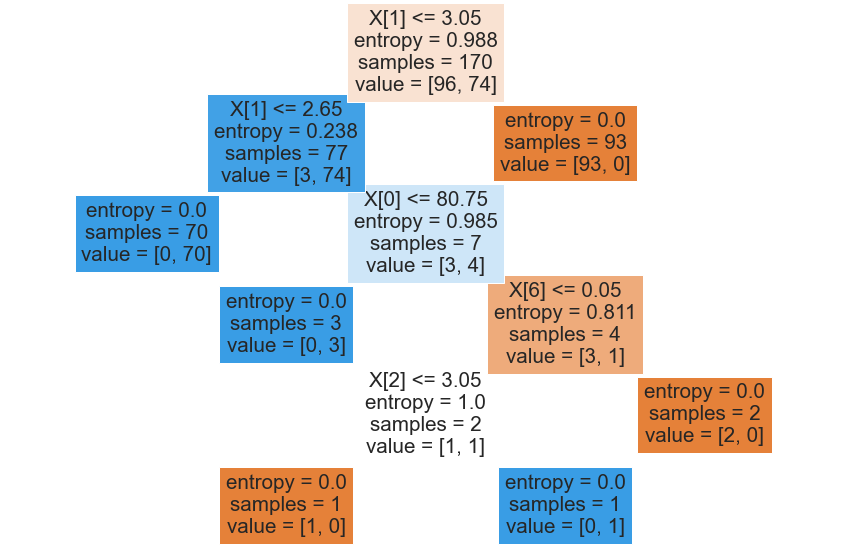

In [131]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

## SVM

In [132]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print("r2 score-",r2_score(Y_test,Y_pred))

r2 score- 0.5044642857142858


## Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier
regressor=RandomForestClassifier()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
print("r2 score-",r2_score(Y_test,Y_pred))

r2 score- 0.5031581626970869


## AdaBoost

In [141]:
from sklearn.ensemble import AdaBoostClassifier
regressor=AdaBoostClassifier()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
print("r2 score-",r2_score(Y_test,Y_pred))

r2 score- 0.06047444036084204


### For Classification model Decision Tree is giving Highest Accuracy-83%

## Model Building- Regression

In [138]:
## Create Independent and Dependent features
X=data[['year','month','day','ISI','FFMC','RH','Classes','region']]
Y=data['Temperature']

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

### Linear Regression

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
regressor=LinearRegression()
linear=regressor.fit(X_train,Y_train)
Y_pred=linear.predict(X_test)
print("r2 Score-",r2_score(Y_test,Y_pred))
mse_values=cross_val_score(regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
print(np.mean(mse_values))

r2 Score- 0.48886105634523014
-9.196534706431025


### Ridge Regression

In [143]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
regressor=Ridge()
ridge=regressor.fit(X_train,Y_train)
Y_pred=ridge.predict(X_test)
print("r2 Score-",r2_score(Y_test,Y_pred))
parameters={'alpha':[1e-15,1e-3,1e-3,1e-2,1,5,10,20,30,40,50]}
mse_values=cross_val_score(regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
print(np.mean(mse_values))
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
ridge_regressor.fit(X,Y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

r2 Score- 0.4892754819146363
-9.157539579378804
Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50337e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27554e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43892e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.60271e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64852e-20): result may

{'alpha': 50}
-8.408339969050445


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


### Lasso Regression

In [144]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
regressor=Lasso()
lasso=regressor.fit(X_train,Y_train)
Y_pred=lasso.predict(X_test)
print("r2 Score-",r2_score(Y_test,Y_pred))
parameters={'alpha':[1e-15,1e-3,1e-3,1e-2,1,5,10,20,30,40,50]}
mse_values=cross_val_score(regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
print(np.mean(mse_values))
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
lasso_regressor.fit(X,Y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

r2 Score- 0.499994822262981
-7.668550590897897
Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280.857309325262, tolerance: 0.20886871794871795
  model = cd_fast.enet_coordinate_descent(


{'alpha': 1}
-7.668550590897897


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


### ElasticNet Regression

In [145]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
regressor=ElasticNet()
elasticnet=regressor.fit(X_train,Y_train)
Y_pred=elasticnet.predict(X_test)
print("r2 Score-",r2_score(Y_test,Y_pred))
parameters={'alpha':[1e-15,1e-3,1e-3,1e-2,1,5,10,20,30,40,50]}
mse_values=cross_val_score(regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
print(np.mean(mse_values))
elasticNet_regressor=GridSearchCV(elasticnet,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
elasticNet_regressor.fit(X,Y)
print(elasticNet_regressor.best_params_)
print(elasticNet_regressor.best_score_)

r2 Score- 0.49818897174357546
-7.739595020134817
Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 5}
-7.592655304582562


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


### Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
logistic=regressor.fit(X_train,Y_train)
Y_pred=logistic.predict(X_test)
print("r2 Score-",r2_score(Y_test,Y_pred))
mse_values=cross_val_score(regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
print(np.mean(mse_values))

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

r2 Score- 0.38660048048621387


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

-8.116836734693877


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [149]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
print("r2 score-",r2_score(Y_test,Y_pred))

r2 score- 0.4183889392709974


### SVM

In [152]:
from sklearn.svm import SVR
regressor=SVR(kernel="rbf")
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
print("r2 score-",r2_score(Y_test,Y_pred))

r2 score- 0.006035881014323952


### Random Forest

In [155]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor=RandomForestRegressor()
random_forest_regressor.fit(X_train,Y_train)
Y_pred = random_forest_regressor.predict(X_test)
print("r2 score-",r2_score(Y_test,Y_pred))

r2 score- 0.6105017835266414


### Adaboost

In [154]:
from sklearn.ensemble import AdaBoostRegressor
regressor=AdaBoostRegressor()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
print("r2 score-",r2_score(Y_test,Y_pred))

r2 score- 0.5702761522347155


### For Regression model Random Forest is giving Highest Accuracy-61%

## Pickling best Models for Classification and Regression

In [159]:
import pickle
pickle.dump(random_forest_regressor,open('random_forest_regressor.pkl','wb'))
pickle.dump(Decision_Tree_Classifier,open('Decision_Tree_Classifier.pkl','wb'))